In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [22]:
plt.style.use?

Signature: plt.style.use(style)
Docstring:
Use matplotlib style settings from a style specification.

The style name of 'default' is reserved for reverting back to
the default style settings.

Parameters
----------
style : str, dict, or list
    A style specification. Valid options are:

    +------+-------------------------------------------------------------+
    | str  | The name of a style or a path/URL to a style file. For a    |
    |      | list of available style names, see `style.available`.       |
    +------+-------------------------------------------------------------+
    | dict | Dictionary with valid key/value pairs for                   |
    |      | `matplotlib.rcParams`.                                      |
    +------+-------------------------------------------------------------+
    | list | A list of style specifiers (str or dict) applied from first |
    |      | to last in the list.                                        |
    +------+------------------------

In [23]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


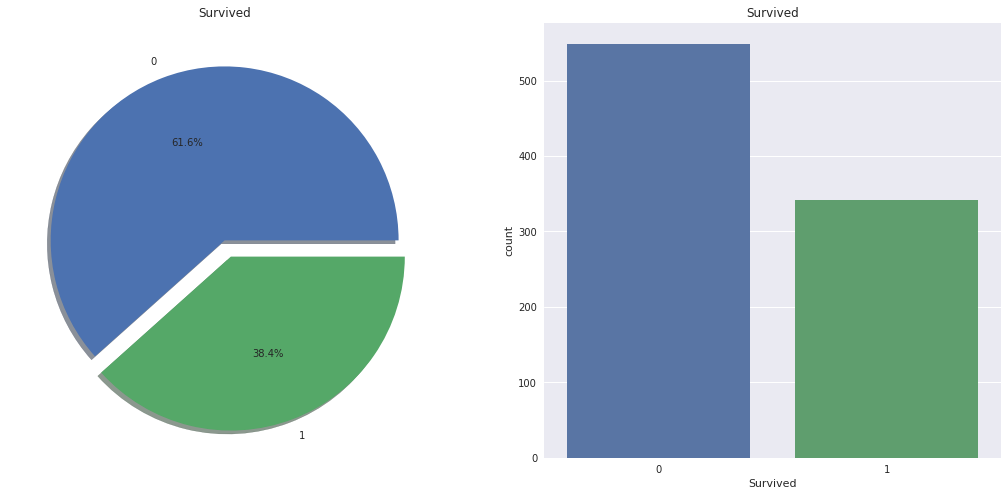

In [24]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [25]:
pandas.plot.pie?

Object `pandas.plot.pie` not found.


In [26]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [27]:
data.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

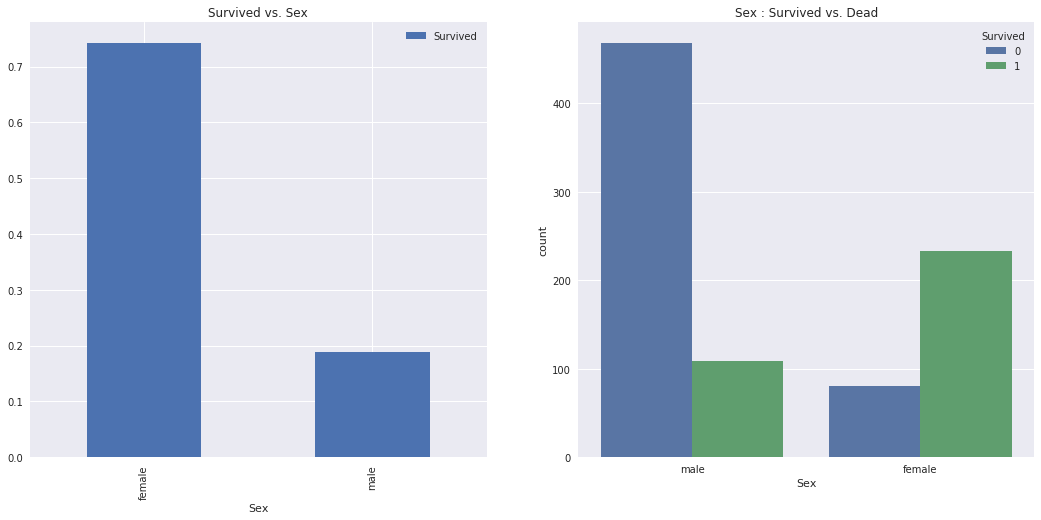

In [28]:
f, ax = plt.subplots(1, 2, figsize = (18,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex : Survived vs. Dead')

plt.show()

In [29]:
pd.crosstab?

Signature:
pd.crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins=False,
    margins_name: str = 'All',
    dropna: bool = True,
    normalize=False,
) -> 'DataFrame'
Docstring:
Compute a simple cross tabulation of two (or more) factors. By default
computes a frequency table of the factors unless an array of values and an
aggregation function are passed.

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows.
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns.
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
rownames : sequence, default None
    If passed, must match number of row arrays passed.
colnames : sequence, default None
    If passed, must match number of column arrays passed.
aggfunc : function, optional
    If specified, requires `values

In [30]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


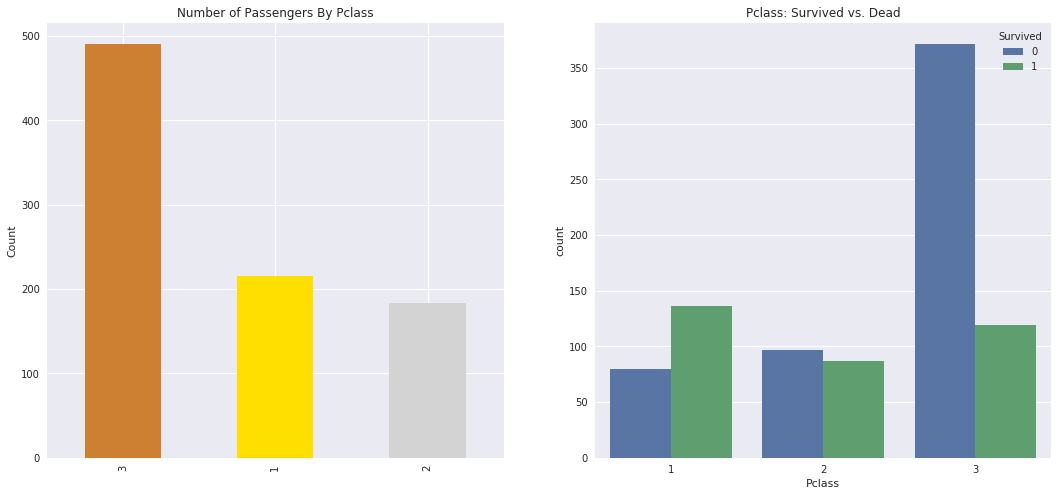

In [34]:
f, ax = plt.subplots(1,2, figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead')
plt.show()

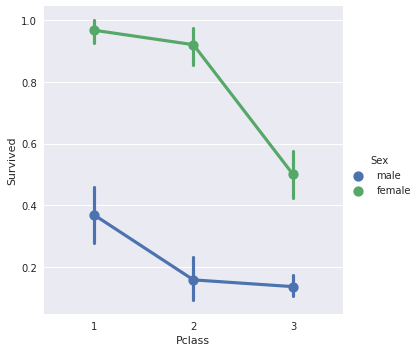

In [36]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [37]:
print (data.Age.max())
print (data.Age.min())
print (data.Age.mean())

80.0
0.42
29.69911764705882


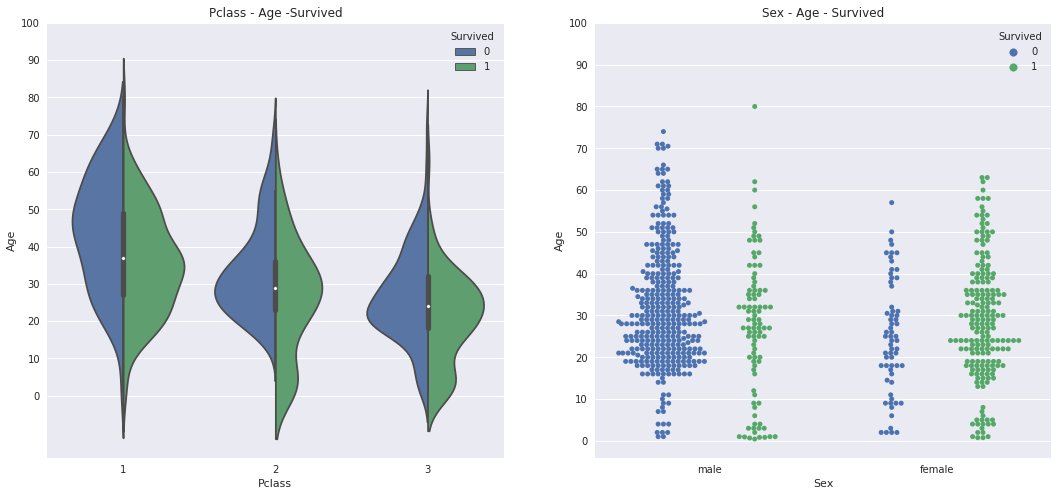

In [42]:
f, ax = plt.subplots(1,2,figsize=(18,8))

sns.violinplot('Pclass','Age',hue='Survived',data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass - Age -Survived')
ax[0].set_yticks(range(0,110,10))

sns.swarmplot('Sex','Age',hue='Survived',data=data, split=True, ax=ax[1])
ax[1].set_title('Sex - Age - Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [39]:
data.Age.isnull().sum()

177

In [43]:
data['Initial'] = 0
for i in data :
    data.Initial = data.Name.str.extract('([A-Za-z]+)\.')

In [52]:
pd.Series.str.extract?

Signature: pd.Series.str.extract(self, pat, flags=0, expand=True)
Docstring:
Extract capture groups in the regex `pat` as columns in a DataFrame.

For each subject string in the Series, extract groups from the
first match of regular expression `pat`.

Parameters
----------
pat : str
    Regular expression pattern with capturing groups.
flags : int, default 0 (no flags)
    Flags from the ``re`` module, e.g. ``re.IGNORECASE``, that
    modify regular expression matching for things like case,
    spaces, etc. For more details, see :mod:`re`.
expand : bool, default True
    If True, return DataFrame with one column per capture group.
    If False, return a Series/Index if there is one capture group
    or DataFrame if there are multiple capture groups.

Returns
-------
DataFrame or Series or Index
    A DataFrame with one row for each subject string, and one
    column for each group. Any capture group names in regular
    expression pat will be used for column names; otherwise
    captur

In [53]:
data.Initial.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

In [54]:
data.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Don           1
Lady          1
Mme           1
Ms            1
Sir           1
Capt          1
Jonkheer      1
Name: Initial, dtype: int64

In [65]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='RdBu')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Object `pd.style.background_gradient` not found.


In [66]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [67]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [73]:
from math import ceil

data.Age.loc[data.Initial == 'Mr'].mean()

32.73960880195599

In [75]:
data.Age.loc[(data.Age.isnull()) & (data.Initial=='Mr')] = data.Age.loc[data.Initial == 'Mr'].mean()
data.Age.loc[(data.Age.isnull()) & (data.Initial=='Mrs')] = data.Age.loc[data.Initial == 'Mrs'].mean()
data.Age.loc[(data.Age.isnull()) & (data.Initial=='Master')] = data.Age.loc[data.Initial == 'Master'].mean()
data.Age.loc[(data.Age.isnull()) & (data.Initial=='Miss')] = data.Age.loc[data.Initial == 'Miss'].mean()
data.Age.loc[(data.Age.isnull()) & (data.Initial=='Other')] = data.Age.loc[data.Initial == 'Other'].mean()

In [77]:
data.Age.isnull().any()

False

In [79]:
data.fillna?

Signature:
data.fillna(
    value=None,
    method=None,
    axis=None,
    inplace=False,
    limit=None,
    downcast=None,
) -> Union[ForwardRef('DataFrame'), NoneType]
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use next valid observation to fill gap.
axis : {0 or 'index', 1 or 'columns'}
    Axis along which to fill missing values.
inplace : bool, default False
    If True, fill in-place. Note: this will modify a

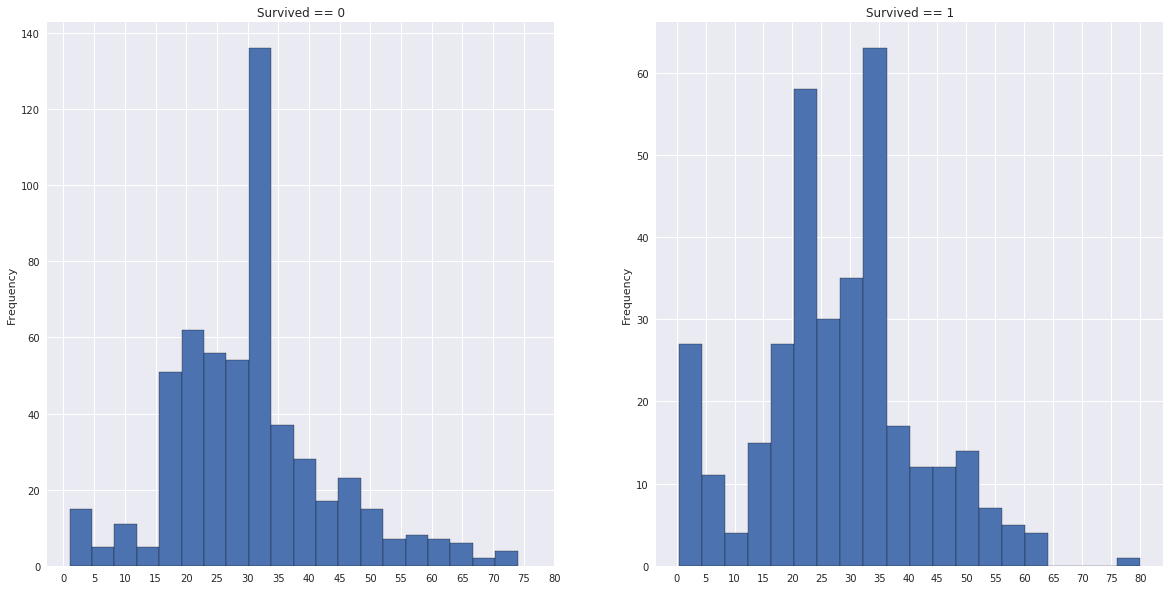

In [80]:
f, ax = plt.subplots(1,2,figsize=(20,10))

data.Age.loc[data.Survived==0].plot.hist(ax=ax[0], bins=20, edgecolor='black',)
ax[0].set_title('Survived == 0')
ax[0].set_xticks( list(range(0,85,5)) )

data.Age.loc[data['Survived']==1].plot.hist(ax=ax[1], bins=20, edgecolor='black')
ax[1].set_title('Survived == 1')
ax[1].set_xticks( list(range(0,85,5)) )

plt.show()

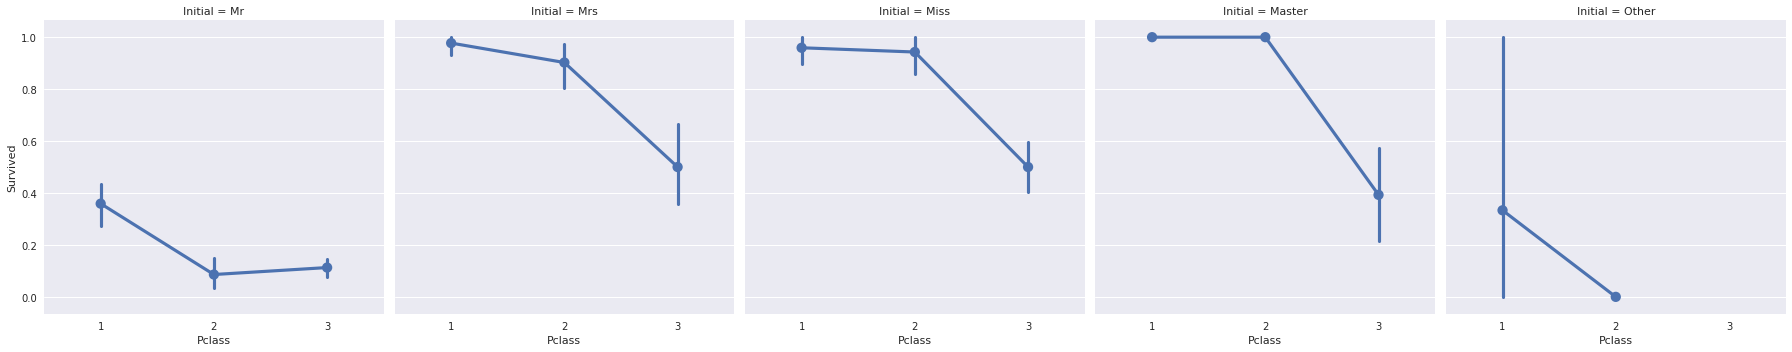

In [81]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

In [82]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap = 'rainbow')

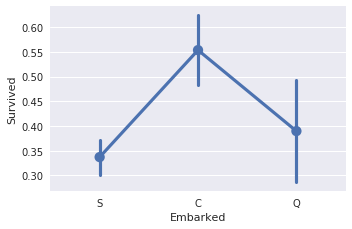

In [83]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

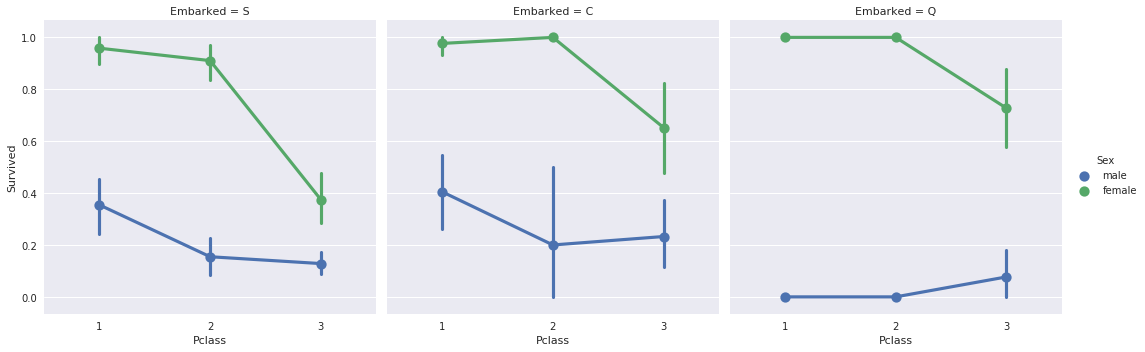

In [84]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [102]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap = "Set2",)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


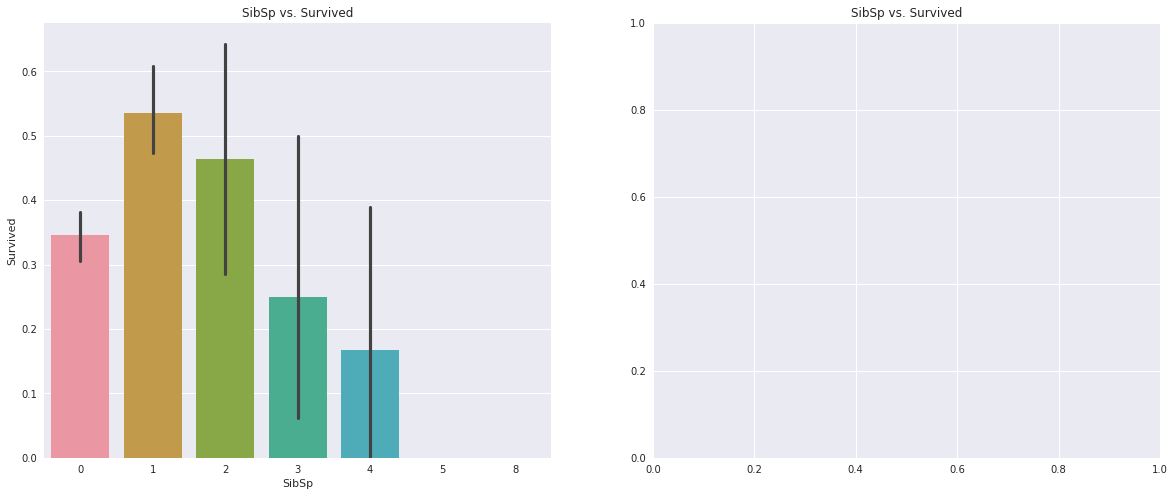

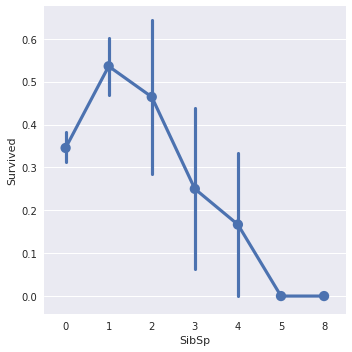

In [113]:
f, ax = plt.subplots(1,2,figsize=(20,8))

sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs. Survived')

sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs. Survived')

plt.show()
plt.close()

In [111]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [114]:
print (data.Fare.mean())
print (data.Fare.max())
print (data.Fare.min())

32.204207968574636
512.3292
0.0


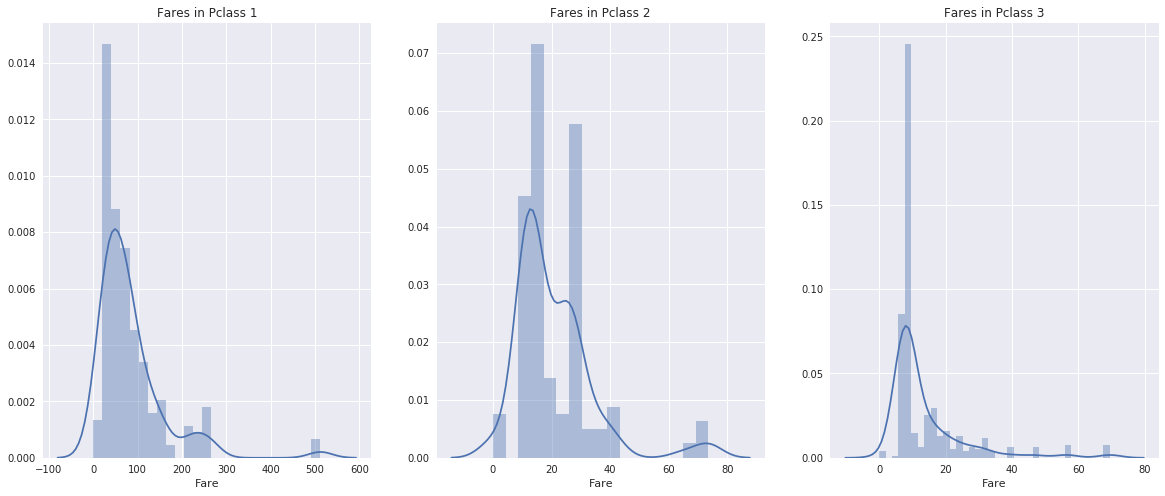

In [115]:
f, ax = plt.subplots(1,3, figsize=(20,8))

sns.distplot(data.Fare[data['Pclass']==1], ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data.Fare[data['Pclass']==2], ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data.Fare[data['Pclass']==3], ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

In [116]:
data.Fare[data['Fare']==0].value_counts()

0.0    15
Name: Fare, dtype: int64

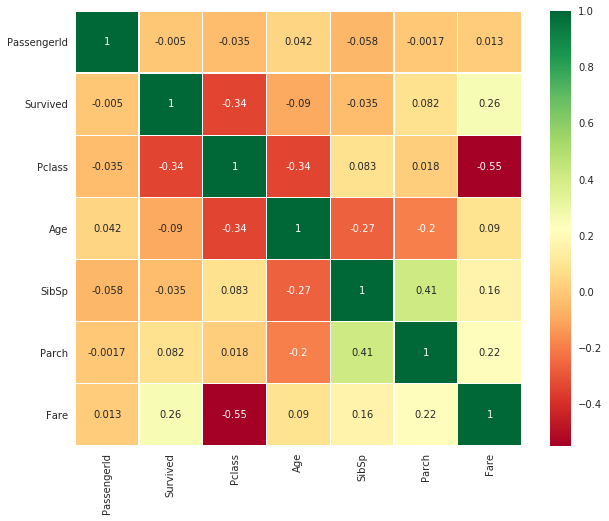

In [121]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
plt.gcf().set_size_inches(10,8)
plt.show()

In [119]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise they a